In [116]:
import os
import re
from pathlib import Path

import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from einops import rearrange

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

In [21]:
import mushroom.data.cosmx as cosmx
import mushroom.data.multiplex as multiplex
import mushroom.registration.bigwarp as bigwarp
import mushroom.utils as utils
import mushroom.visualization.tiling_utils as tiling_utils

#### HT704B1

In [7]:
# visium hd
# /diskmnt/primary/Spatial_Transcriptomics/VisiumHD_run/FFPE/SpacerangerOut/HTAN/BRCA/HT704B1-S1H3Fp1//HT704B1-S1H3Fp1U2/outs
# /diskmnt/primary/Spatial_Transcriptomics/VisiumHD_run/FFPE/SpacerangerOut/HTAN/BRCA/HT704B1-S1H3Fp1//HT704B1-S1H3Fp1U51/outs

# he
# /diskmnt/Projects/Users/estorrs/imaging-analysis/data/htan_talk/visium_hd/HT704B1-S1H3Fp1U2.ome.tif
# /diskmnt/Projects/Users/estorrs/imaging-analysis/data/htan_talk/visium_hd/HT704B1-S1H3Fp1U51.ome.tif

In [148]:
case = 'HT704B1'
sid = 'HT704B1-U2'

unregistered_visium_dir = Path('/diskmnt/primary/Spatial_Transcriptomics/VisiumHD_run/FFPE/SpacerangerOut/HTAN/BRCA/HT704B1-S1H3Fp1/HT704B1-S1H3Fp1U2/outs')
unregistered_he_fp = '/diskmnt/Projects/Users/estorrs/imaging-analysis/data/htan_talk/visium_hd/HT704B1-S1H3Fp1U2.ome.tif'

visium_ddf_fp = '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT704B1/registration/sidecar_HT704B1-U2_visiumhd_ddf.tif'
he_ddf_fp = '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT704B1/registration/sidecar_HT704B1-U2_he_ddf.tif'


In [194]:
case = 'HT704B1'
sid = 'HT704B1-U51'

unregistered_visium_dir = Path('/diskmnt/primary/Spatial_Transcriptomics/VisiumHD_run/FFPE/SpacerangerOut/HTAN/BRCA/HT704B1-S1H3Fp1/HT704B1-S1H3Fp1U51/outs')
unregistered_he_fp = '/diskmnt/Projects/Users/estorrs/imaging-analysis/data/htan_talk/visium_hd/HT704B1-S1H3Fp1U51.ome.tif'

visium_ddf_fp = '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT704B1/registration/sidecar_HT704B1-U51_visiumhd_ddf.tif'
he_ddf_fp = '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT704B1/registration/sidecar_HT704B1-U51_he_ddf.tif'


#### HT891Z1

In [216]:
# /diskmnt/primary/Spatial_Transcriptomics/VisiumHD_run/FFPE/SpacerangerOut/HTAN/PCa/HT891Z1-S2H3Fp1/HT891Z1-S2H3Fp1U2/outs
# /diskmnt/primary/Spatial_Transcriptomics/VisiumHD_run/FFPE/SpacerangerOut/HTAN/PCa/HT891Z1-S2H3Fp1/HT891Z1-S2H3Fp1U33/outs

# /diskmnt/Projects/Users/estorrs/imaging-analysis/data/htan_talk/visium_hd/HT891Z1-U2.ome.tif
# /diskmnt/Projects/Users/estorrs/imaging-analysis/data/htan_talk/visium_hd/HT891Z1-U33.ome.tif

In [260]:
case = 'HT891Z1'
sid = 'HT891Z1-U2'

unregistered_visium_dir = Path('/diskmnt/primary/Spatial_Transcriptomics/VisiumHD_run/FFPE/SpacerangerOut/HTAN/PCa/HT891Z1-S2H3Fp1/HT891Z1-S2H3Fp1U2/outs')
unregistered_he_fp = '/diskmnt/Projects/Users/estorrs/imaging-analysis/data/htan_talk/visium_hd/HT891Z1-U2.ome.tif'

visium_ddf_fp = '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT891Z1/registration/sidecar_HT891Z1-U2_visiumhd_ddf.tif'
he_ddf_fp = '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT891Z1/registration/sidecar_HT891Z1-U2_visiumhd_he_ddf.tif'


In [274]:
case = 'HT891Z1'
sid = 'HT891Z1-U33'

unregistered_visium_dir = Path('/diskmnt/primary/Spatial_Transcriptomics/VisiumHD_run/FFPE/SpacerangerOut/HTAN/PCa/HT891Z1-S2H3Fp1/HT891Z1-S2H3Fp1U33/outs')
unregistered_he_fp = '/diskmnt/Projects/Users/estorrs/imaging-analysis/data/htan_talk/visium_hd/HT891Z1-U33.ome.tif'

visium_ddf_fp = '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT891Z1/registration/sidecar_HT891Z1-U33_visiumhd_ddf.tif'
he_ddf_fp = '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT891Z1/registration/sidecar_HT891Z1-U33_visiumhd_he_ddf.tif'


## processing

In [275]:
project_dir = Path('/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1') / case

In [276]:
img = tifffile.imread(unregistered_he_fp)
he_ddf = bigwarp.read_bigwarp_warp_field(he_ddf_fp, .2)
he_ddf.shape, img.shape

(torch.Size([2, 6530, 7255]), (12509, 13539, 3))

In [277]:
warped = bigwarp.register_he(rearrange(img, 'h w c -> c h w'), he_ddf)
warped.shape

(3, 6530, 7255)

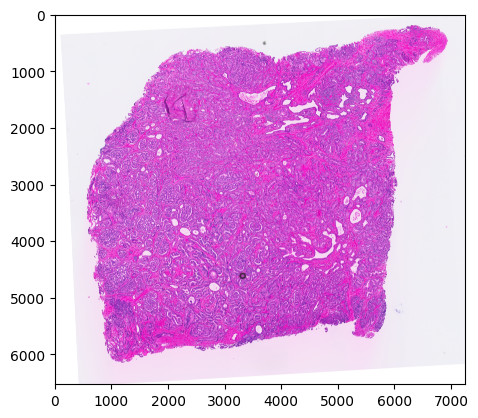

In [278]:
plt.imshow(rearrange(warped, 'c h w -> h w c'))


In [279]:
output_filepath = project_dir / 'registered' / f'{sid}_visiumhd_he.ome.tiff'
multiplex.write_basic_ome_tiff(
    output_filepath,
    warped, ['red', 'green', 'blue'], microns_per_pixel=1.
)

In [280]:
adata = sc.read_10x_h5(unregistered_visium_dir / 'binned_outputs/square_002um/filtered_feature_bc_matrix.h5')
adata

/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 5667494 × 18085
    var: 'gene_ids', 'feature_types', 'genome'

In [281]:
pattern = re.compile(r'^.*um_([0-9]+)_([0-9]+)-1$')
cc = np.asarray([int(re.sub(pattern, r'\1', x)) for x in adata.obs.index.to_list()])
rr = np.asarray([int(re.sub(pattern, r'\2', x)) for x in adata.obs.index.to_list()])
rr, cc

(array([2414, 2130, 2283, ..., 1644, 1011, 2194]),
 array([ 775,  700, 1790, ..., 2448,  292, 1016]))

In [282]:
visium_ddf = bigwarp.read_bigwarp_warp_field(visium_ddf_fp, .2)
visium_ddf.shape

torch.Size([2, 6530, 7255])

In [283]:
pts = np.asarray([rr, cc]).T.astype(float)
pts

array([[2414.,  775.],
       [2130.,  700.],
       [2283., 1790.],
       ...,
       [1644., 2448.],
       [1011.,  292.],
       [2194., 1016.]])

In [284]:
warped_pts, mask = bigwarp.warp_pts_fast(pts, visium_ddf)
warped_pts.shape

(5626166, 2)

In [285]:
adata = adata[mask]
adata.obs['y_location'] = warped_pts[:, 0]
adata.obs['x_location'] = warped_pts[:, 1]

/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/diskmnt/Projects/Users/estorrs/sandbox/tmp/ipykernel_164857/2706826779.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['y_location'] = warped_pts[:, 0]
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_name

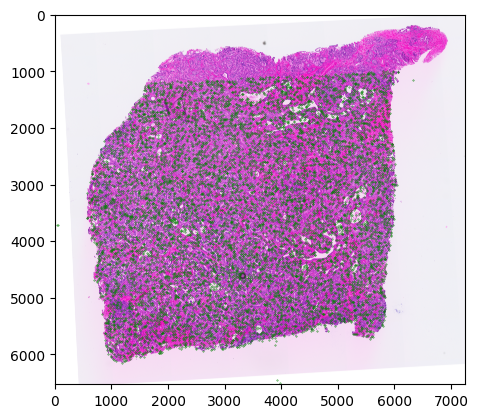

In [286]:
idxs = np.random.permutation(np.arange(warped_pts.shape[0]))[:10000]
small = warped_pts[idxs]

plt.imshow(rearrange(warped, 'c h w -> h w c'))

plt.scatter(small[:, 1], small[:, 0], s=.1, c='green')

In [287]:
output_filepath = project_dir / 'registered' / f'{sid}_visiumhd.h5ad'
adata.write_h5ad(output_filepath)

## sidecar DDF generation

###### he

In [247]:
import tifffile
scaler = .2
img = tifffile.imread(unregistered_he_fp)
img = utils.rescale(img, scale=scaler, dim_order='h w c', target_dtype=img.dtype)
output_filepath = project_dir / 'registration' / 'unregistered_tifs' / f'sidecar_{sid}_he.tif'
tifffile.imwrite(output_filepath, img, compression='LZW')

###### visiumhd

In [248]:
adata = sc.read_10x_h5(unregistered_visium_dir / 'binned_outputs/square_002um/filtered_feature_bc_matrix.h5')
adata

/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 6460977 × 18085
    var: 'gene_ids', 'feature_types', 'genome'

In [249]:
adata.var

,gene_ids,feature_types,genome
SAMD11,ENSG00000187634,Gene Expression,GRCh38
NOC2L,ENSG00000188976,Gene Expression,GRCh38
KLHL17,ENSG00000187961,Gene Expression,GRCh38
PLEKHN1,ENSG00000187583,Gene Expression,GRCh38
PERM1,ENSG00000187642,Gene Expression,GRCh38
...,...,...,...
MT-ND4L,ENSG00000212907,Gene Expression,GRCh38
MT-ND4,ENSG00000198886,Gene Expression,GRCh38
MT-ND5,ENSG00000198786,Gene Expression,GRCh38
MT-ND6,ENSG00000198695,Gene Expression,GRCh38


In [250]:
pool = set()
to_keep = []
for g in adata.var.index.to_list():
    if g not in pool:
        pool.add(g)
        to_keep.append(True)
    else:
        to_keep.append(False)
a = adata[:, to_keep]

genes = ['EPCAM', 'MUC5AC', 'KRT14', 'KRT5', 'PTPRC', 'IL7R', 'PECAM1', 'VIM']
a = a[:, genes]

a

/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


View of AnnData object with n_obs × n_vars = 6460977 × 8
    var: 'gene_ids', 'feature_types', 'genome'

In [251]:
pattern = re.compile(r'^.*um_([0-9]+)_([0-9]+)-1$')
cc = np.asarray([int(re.sub(pattern, r'\1', x)) for x in a.obs.index.to_list()])
rr = np.asarray([int(re.sub(pattern, r'\2', x)) for x in a.obs.index.to_list()])
rr, cc

(array([2414, 2130, 2283, ..., 1644,  756, 2194]),
 array([ 775,  700, 1790, ..., 2448, 2703, 1016]))

In [252]:
X = a.X.toarray().astype(int)
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [253]:
np.unique(X)

array([0, 1, 2, 3, 4, 5])

In [254]:
data = np.zeros((len(genes), rr.max() + 1, cc.max() + 1), dtype=int)
for i, (r, c) in enumerate(zip(rr, cc)):
    data[:, r, c] = X[i]

In [255]:
colors = ['red', 'red', 'white', 'white', 'limegreen', 'limegreen', 'cyan', 'yellow']

rgb = multiplex.to_pseudocolor(
    data,
    colors=colors,
    max_values=[1] * len(colors),
)

rgb *= 255.
rgb = rgb.astype(np.uint8)

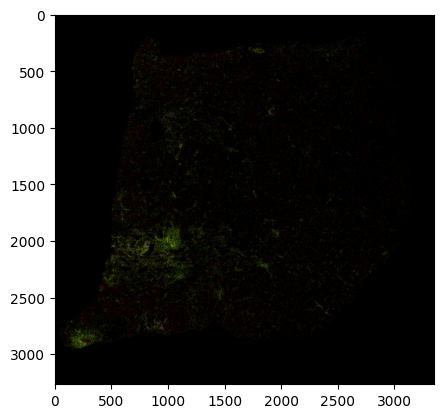

In [256]:
plt.imshow(rgb)

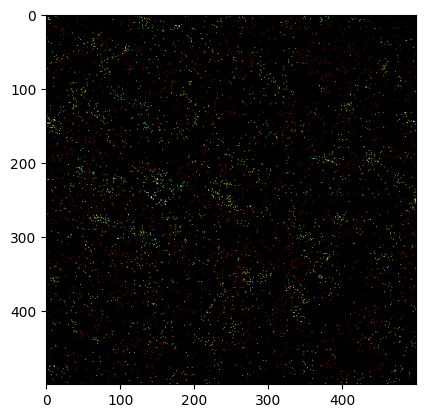

In [257]:
plt.imshow(rgb[2000:2500, 2000:2500])

In [258]:
rgb = utils.rescale(rgb, scale=.2, dim_order='h w c', target_dtype=rgb.dtype)
rgb.shape

(653, 670, 3)

In [259]:
output_filepath = project_dir / 'registration' / 'unregistered_tifs' / f'sidecar_{sid}_visiumhd.tif'
tifffile.imwrite(output_filepath, rgb, compression='LZW')